In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
class Plate:
    def __init__(self, thickness, length, width, thermal_conductivity, emissivity):
        self.thickness = thickness
        self.length = length
        self.width = width
        self.thermal_conductivity = thermal_conductivity
        self.emissivity = emissivity

class HeatTransferSolver:
    def __init__(self, plate, h, T_ambient, T_sky, T_water):
        self.plate = plate
        self.h = h
        self.T_ambient = T_ambient
        self.T_sky = T_sky
        self.T_water = T_water
        self.T = None
    
    def initialize_grid(self, nx, ny):
        self.nx = nx
        self.ny = ny
        self.dx = self.plate.length / (nx - 1)
        self.dy = self.plate.width / (ny - 1)
        self.T = np.full((ny, nx), self.T_ambient)

        # Boundary conditions
        self.T[:, 0] = self.T_water
        self.T[:, -1] = self.T_water
        self.T[0, :] = self.T_water

    def solve(self, max_iterations=10000, tolerance=1e-4):
        error = np.inf
        iteration = 0

        while error > tolerance and iteration < max_iterations:
            T_old = self.T.copy()

            for i in range(1, self.ny - 1):
                for j in range(1, self.nx - 1):
                    self.T[i, j] = 0.25 * (T_old[i + 1, j] + T_old[i - 1, j] +
                                           T_old[i, j + 1] + T_old[i, j - 1])

            error = np.max(np.abs(self.T - T_old))
            iteration += 1

        print(f"Converged in {iteration} iterations with final error: {error:.10e}")
        return self.T
        
class Visualization:
    def __init__(self, solver):
        self.solver = solver
    
    def plot_temperature_distribution(self):
        X, Y = np.meshgrid(np.linspace(0, self.solver.plate.length, self.solver.nx),
                           np.linspace(0, self.solver.plate.width, self.solver.ny))
        plt.contourf(X, Y, self.solver.T, cmap='coolwarm')
        plt.colorbar(label='Temperature (°C)')
        plt.title('Steady-State Temperature Distribution')
        plt.xlabel('Length (m)')
        plt.ylabel('Width (m)')
        



Converged in 30 iterations with final error: 0.0000000000e+00


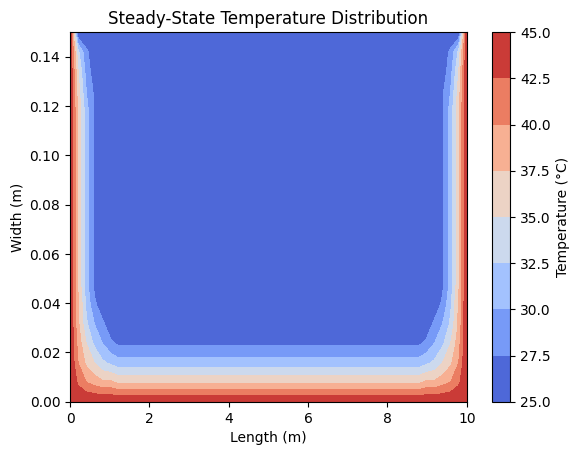

In [25]:
# Define the plate properties
plate = Plate(thickness=0.002, length=10.0, width=0.15, thermal_conductivity=205, emissivity=0.9)

# Set up the solver
solver = HeatTransferSolver(plate, h=15, T_ambient=25, T_sky=7.85, T_water=45)
solver.initialize_grid(nx=50, ny=20)

# Solve for temperature distribution
temperature_distribution = solver.solve()

# Create an instance of the visualization class and plot the temperature distribution
visualization = Visualization(solver)
visualization.plot_temperature_distribution()
plt.savefig("temperature_distributionMesh1.png", dpi=300, bbox_inches='tight')
plt.show()


Converged in 55 iterations with final error: 0.0000000000e+00


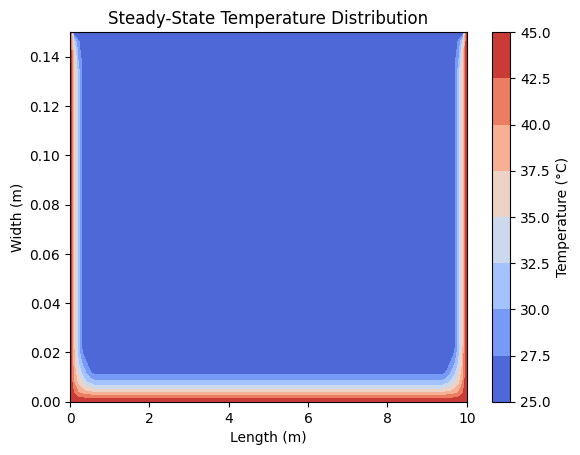

In [26]:
# Define the plate properties
plate = Plate(thickness=0.002, length=10.0, width=0.15, thermal_conductivity=205, emissivity=0.9)

# Set up the solver
solver = HeatTransferSolver(plate, h=15, T_ambient=25, T_sky=7.85, T_water=45)
solver.initialize_grid(nx=100, ny=40)

# Solve for temperature distribution
temperature_distribution = solver.solve()

# Create an instance of the visualization class and plot the temperature distribution
visualization = Visualization(solver)
visualization.plot_temperature_distribution()
plt.savefig("temperature_distributionMesh2.png", dpi=300, bbox_inches='tight')
plt.show()

Converged in 105 iterations with final error: 0.0000000000e+00


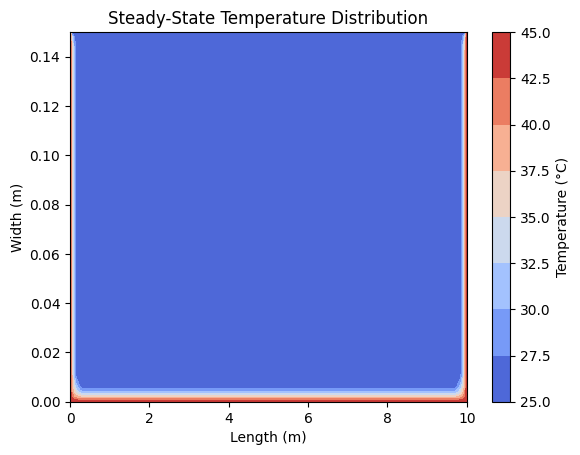

In [27]:
# Define the plate properties
plate = Plate(thickness=0.002, length=10.0, width=0.15, thermal_conductivity=205, emissivity=0.9)

# Set up the solver
solver = HeatTransferSolver(plate, h=15, T_ambient=25, T_sky=7.85, T_water=45)
solver.initialize_grid(nx=200, ny=80)

# Solve for temperature distribution
temperature_distribution = solver.solve()

# Create an instance of the visualization class and plot the temperature distribution
visualization = Visualization(solver)
visualization.plot_temperature_distribution()
plt.savefig("temperature_distributionMesh3.png", dpi=300, bbox_inches='tight')
plt.show()

Converged in 205 iterations with final error: 0.0000000000e+00


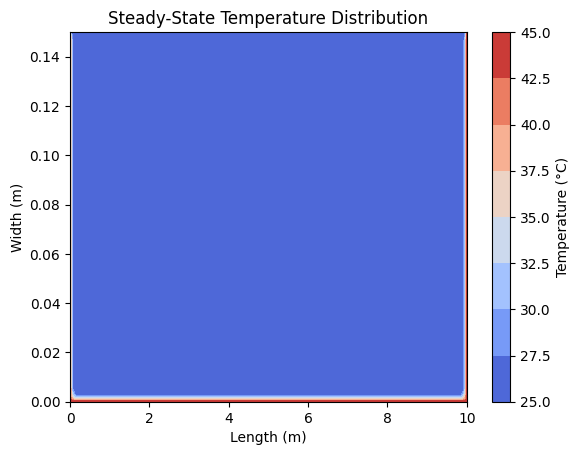

In [28]:
# Define the plate properties
plate = Plate(thickness=0.002, length=10.0, width=0.15, thermal_conductivity=205, emissivity=0.9)

# Set up the solver
solver = HeatTransferSolver(plate, h=15, T_ambient=25, T_sky=7.85, T_water=45)
solver.initialize_grid(nx=400, ny=160)

# Solve for temperature distribution
temperature_distribution = solver.solve()

# Create an instance of the visualization class and plot the temperature distribution
visualization = Visualization(solver)
visualization.plot_temperature_distribution()
plt.savefig("temperature_distributionMesh4.png", dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# Constants for heat transfer calculations
sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m^2·K^4)
epsilon = solver.plate.emissivity
h = solver.h
T_ambient = solver.T_ambient
T_sky = solver.T_sky

# Initialize heat transfer rates
q_conv_total = 0
q_rad_total = 0

# Grid spacing along the x-direction (length of the plate)
dx = solver.plate.length / (solver.nx - 1)

# Loop through the top surface of the plate (y = ny - 1)
for j in range(solver.nx):
    T_surface = solver.T[-1, j]  # Temperature at the top surface node

    # Calculate convective heat transfer at this node
    q_conv = h * (T_surface - T_ambient)

    # Calculate radiative heat transfer at this node
    q_rad = epsilon * sigma * ((T_surface + 273.15)**4 - (T_sky + 273.15)**4)

    # Accumulate the heat flux contributions
    q_conv_total += q_conv * dx
    q_rad_total += q_rad * dx

# Calculate the total heat transfer rate per unit area
q_total = q_conv_total + q_rad_total

print(f"Total convective heat transfer rate: {q_conv_total:.2f} W")
print(f"Total radiative heat transfer rate: {q_rad_total:.2f} W")
print(f"Total heat transfer rate per unit area: {q_total:.2f} W")


Total convective heat transfer rate: 15.04 W
Total radiative heat transfer rate: 858.90 W
Total heat transfer rate per unit area: 873.94 W


In [30]:
# Given values
mass_flow_rate = 0.045  # Mass flow rate of water (kg/s)
cp_water = 4184  # Specific heat capacity of water (J/kg·K)
T_inlet = solver.T_water  # Inlet temperature of water (°C)

# Calculate the total surface area of the plate
area = solver.plate.length * solver.plate.width

# Calculate the outlet temperature of the water
T_outlet = T_inlet - (q_total * area) / (mass_flow_rate * cp_water)

print(f"Estimated outlet temperature of water: {T_outlet:.2f} °C")


Estimated outlet temperature of water: 38.04 °C
